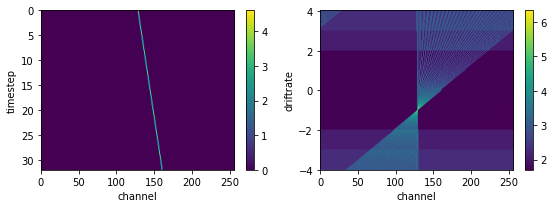

In [6]:



import numpy as np
import astropy.units as u
import pylab as plt
from hyperseti import dedoppler
from hyperseti import plotting 
%matplotlib inline

# Create a drifting test signal
N_timestep, N_chans = 32, 256
test_data = np.ones(shape=(N_timestep, 1, N_chans ), dtype='float32')
for ii in range(N_timestep):
    test_data[ii, 0, N_chans // 2 + ii] = 100

# Create basic metadata
metadata = {'frequency_start': 1000*u.MHz, 'time_step': 1.0*u.s, 'frequency_step': 1.0*u.Hz}

# Run dedoppler
dedopp, metadata= dedoppler(test_data, metadata, boxcar_size=1, max_dd=4.0)

# Imshow output
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
plotting.imshow_waterfall(np.log(test_data), metadata)
plt.subplot(1,2,2)
plotting.imshow_dedopp(np.log(dedopp), metadata)
plt.tight_layout()

In [59]:
import setigen as stg

drift_factor = 4
fr = stg.Frame(shape=(16, 128))
print(fr.get_frequency(16)/1e6)
drift_rate = drift_factor * fr.unit_drift_rate
fr.add_signal(stg.constant_path(f_start=fr.get_frequency(16),
                                drift_rate=drift_rate),
              stg.constant_t_profile(level=1),
              stg.box_f_profile(width=fr.df),
              doppler_smearing=True,
              smearing_subsamples=drift_factor)
# fr.plot()
# plt.show()

# fr.bl_plot()
# plt.show()

5999.999689869584


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
#fr.save_fil(filename='frame.fil')

In [15]:
test_data = np.expand_dims(fr.data.astype('float32'), axis=1)

/tmp/ipykernel_6546/2736376712.py:9: RuntimeWarning: divide by zero encountered in log
  plotting.imshow_waterfall(np.log(test_data), metadata)
/tmp/ipykernel_6546/2736376712.py:11: RuntimeWarning: divide by zero encountered in log
  plotting.imshow_dedopp(np.log(dedopp), metadata)


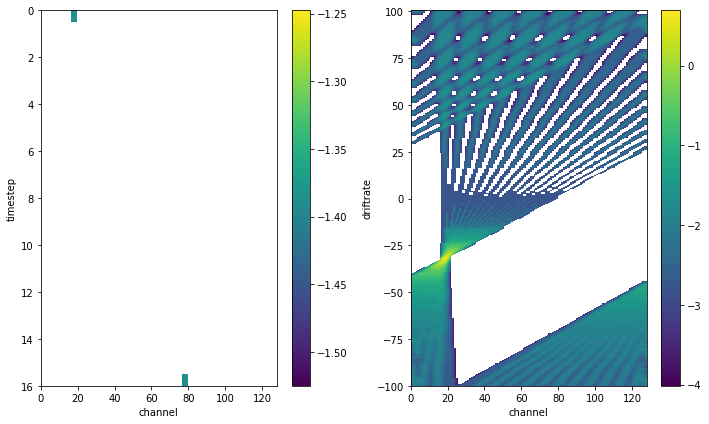

In [52]:
metadata = {'frequency_start': 5999.9*u.MHz, 'time_step': 16.0*u.s, 'frequency_step': 128*u.Hz}

# Run dedoppler
dedopp, metadata= dedoppler(test_data, metadata, boxcar_size=1, max_dd=100.0)

# Imshow output
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plotting.imshow_waterfall(np.log(test_data), metadata)
plt.subplot(1,2,2)
plotting.imshow_dedopp(np.log(dedopp), metadata)
plt.tight_layout()